CA03 Decision Trees


Part 1: Upload Data

In [1]:
#import necessary packages
import pandas as pd #read csv file into dataframe
import matplotlib.pyplot as plt #visuals in exploratory analysis
import seaborn as sns #visualize categorical variables

In [2]:
#import datset
df = pd.read_csv('census_data.csv')
df_train = df[df['flag']=='train']
df_test = df[df['flag']=='test']


Part 2: Data Quality Analysis

In [ ]:
#Test Data Cleaning & Analysis:
#total number of rows and columns
df.shape
#list data types, number of non-null obj, memusafe, columns
df.info()
#check for NULL values
df.isnull().sum() #no null values
#view top records
df.head(10)
#descriptive stats for each column
df.describe(include ='all') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Part 3: Exploratory Data Analysis

In [ ]:
#Variable 1: Age
#Grouped Bar Chart 
#create function to create stacked bar, input as column name
def stacked_bar(column):
    x_chart = df.pivot_table(values=['flag'], index=[column], columns=['y'], aggfunc='count')
    x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
    x_chart.plot(kind="bar",stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    return plt.show()


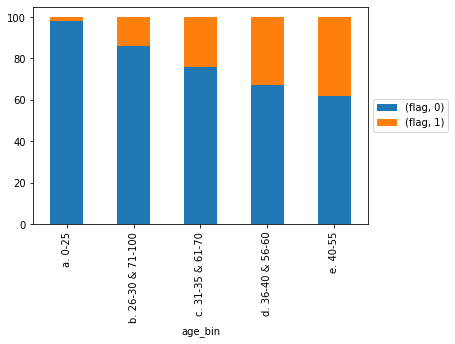

In [ ]:
stacked_bar('age_bin')

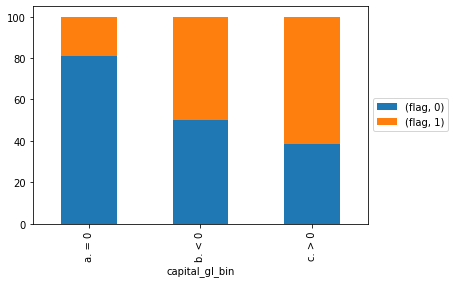

In [ ]:
stacked_bar('capital_gl_bin')

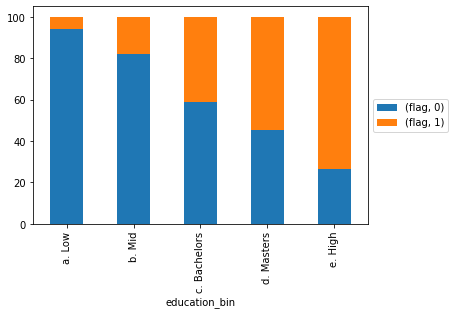

In [ ]:
stacked_bar('education_bin')

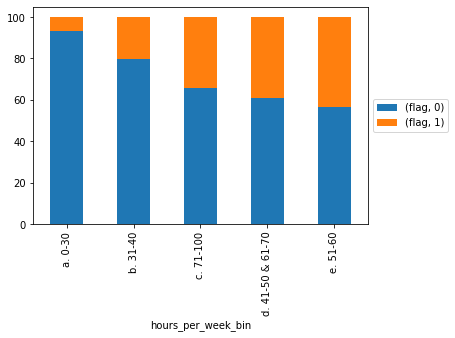

In [ ]:
stacked_bar('hours_per_week_bin')

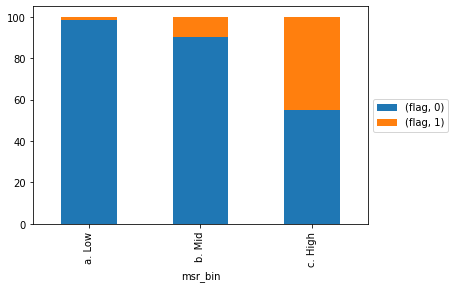

In [ ]:
stacked_bar('msr_bin')

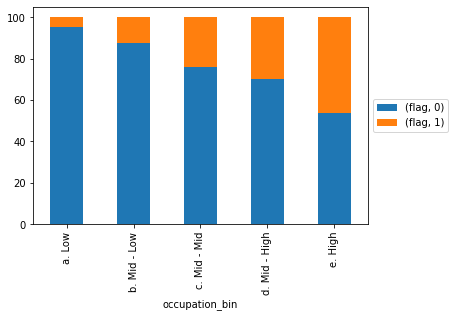

In [ ]:
stacked_bar('occupation_bin')

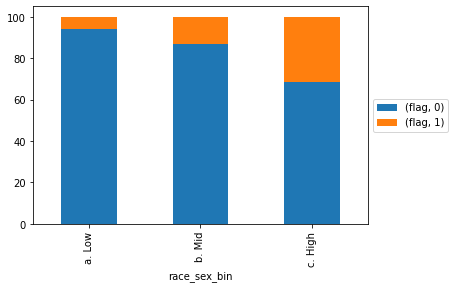

In [ ]:
stacked_bar('race_sex_bin')

Part 4: Decision Tree Classifier Models

In [3]:
# encode categorical columns into numeric 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
census_data_encode = df_train.apply(le.fit_transform) #encode training data

In [4]:
census_data_encode_Test = df_test.apply(le.fit_transform) #encode testing data

In [5]:
#create X and Y variables
feature_columns = ['hours_per_week_bin', 
                   'occupation_bin', 
                   'msr_bin', 
                   'capital_gl_bin', 
                   'race_sex_bin', 
                   'education_num_bin', 
                   'education_bin',
                   'workclass_bin', 
                   'age_bin' ]
X_train = census_data_encode[feature_columns]
Y_train = census_data_encode.y
X_test = census_data_encode_Test[feature_columns]
Y_test = census_data_encode_Test.y

In [6]:
#DecisionTreeClassifier Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=101,
                              max_features = None, min_samples_leaf=5)
dtree.fit(X_train, Y_train)
y_pred=dtree.predict(X_test)
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


Part 5: Visualize Decision Trees

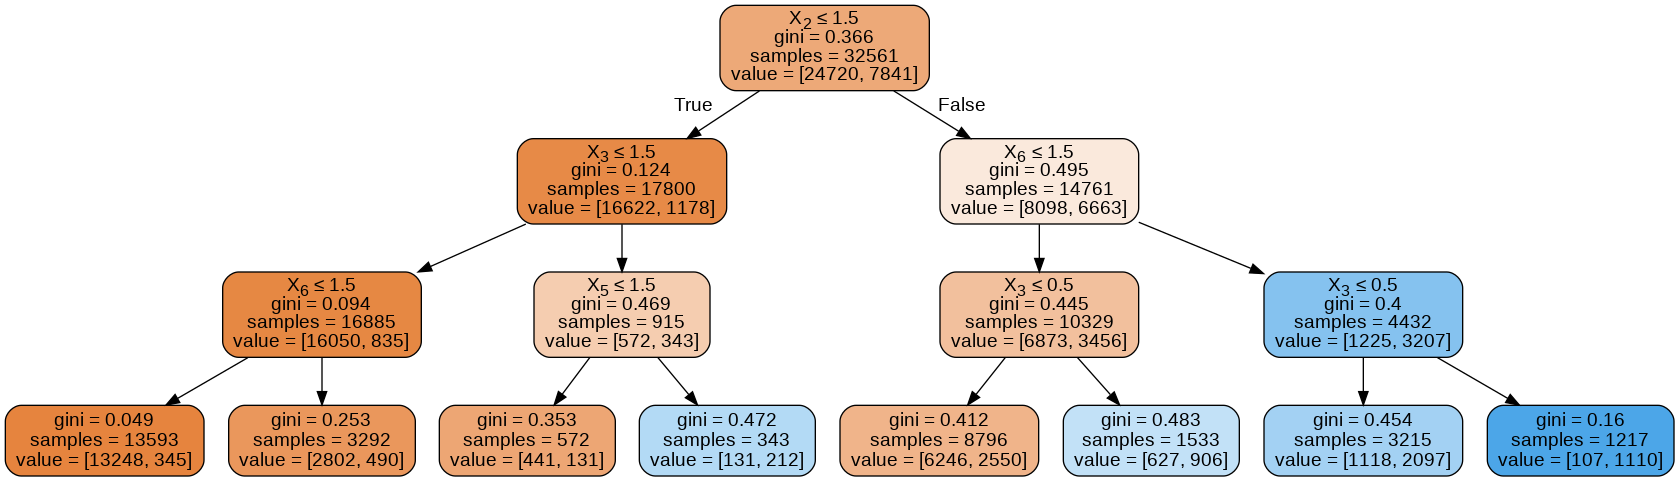

In [ ]:
#import visual packages
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data =StringIO()

export_graphviz(dtree,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Part 6: Evaluate Decision Tree Performance

In [ ]:
from sklearn import metrics

In [ ]:
#Confusion Matrix:
print(metrics.confusion_matrix(Y_test, y_pred))

[[11456   979]
 [ 1743  2103]]


In [ ]:
#Accuracy Score:
print(metrics.accuracy_score(Y_test, y_pred))

0.8328112523800749


In [ ]:
#Precision Score:
print(metrics.precision_score(Y_test, y_pred))

0.68234912394549


In [ ]:
#Recall Score:
print(metrics.recall_score(Y_test, y_pred))

0.546801872074883


In [ ]:
#F1 Score
print(metrics.f1_score(Y_test, y_pred))

0.6071016166281755


In [ ]:
#AUC Value
print(metrics.auc(X_test, y_pred))

ValueError: ignored

In [ ]:
#ROC Curve
print(metrics.roc_curve(Y_test, y_pred))

Part 7: Tune Decision Tree Performance

In [ ]:
#Tree 1-Gini
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred1=dtree.predict(X_test)

In [ ]:
#Tree 1-Performance
print(metrics.confusion_matrix(Y_test, y_pred1))
print(metrics.accuracy_score(Y_test, y_pred1))
print(metrics.precision_score(Y_test, y_pred1))
print(metrics.recall_score(Y_test, y_pred1))
print(metrics.f1_score(Y_test, y_pred1))

In [ ]:
#Tree 2-Gini
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred2=dtree.predict(X_test)

In [ ]:
#Tree 2-Performance
print(metrics.confusion_matrix(Y_test, y_pred2))
print(metrics.accuracy_score(Y_test, y_pred2))
print(metrics.precision_score(Y_test, y_pred2))
print(metrics.recall_score(Y_test, y_pred2))
print(metrics.f1_score(Y_test, y_pred2))

In [ ]:
#Tree 3-Gini
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=2)
dtree.fit(X_train, Y_train)
y_pred3=dtree.predict(X_test)

In [ ]:
#Tree 3-Performance
print(metrics.confusion_matrix(Y_test, y_pred3))
print(metrics.accuracy_score(Y_test, y_pred3))
print(metrics.precision_score(Y_test, y_pred3))
print(metrics.recall_score(Y_test, y_pred3))
print(metrics.f1_score(Y_test, y_pred3))

In [ ]:
#Tree 4-Gini
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 2, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred4=dtree.predict(X_test)

In [ ]:
#Tree 3-Performance
print(metrics.confusion_matrix(Y_test, y_pred4))
print(metrics.accuracy_score(Y_test, y_pred4))
print(metrics.precision_score(Y_test, y_pred4))
print(metrics.recall_score(Y_test, y_pred4))
print(metrics.f1_score(Y_test, y_pred4))

In [ ]:
#Tree 1-Entropy
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred1E=dtree.predict(X_test)

In [ ]:
#Tree 1-Performance
print(metrics.confusion_matrix(Y_test, y_pred1E))
print(metrics.accuracy_score(Y_test, y_pred1E))
print(metrics.precision_score(Y_test, y_pred1E))
print(metrics.recall_score(Y_test, y_pred1E))
print(metrics.f1_score(Y_test, y_pred1E))

In [ ]:
#Tree 2-Entropy
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred2E=dtree.predict(X_test)

In [ ]:
#Tree 2-Performance
print(metrics.confusion_matrix(Y_test, y_pred2E))
print(metrics.accuracy_score(Y_test, y_pred2E))
print(metrics.precision_score(Y_test, y_pred2E))
print(metrics.recall_score(Y_test, y_pred2E))
print(metrics.f1_score(Y_test, y_pred2E))

In [ ]:
#Tree 3-Entropy
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 1.0, min_samples_leaf=2)
dtree.fit(X_train, Y_train)
y_pred3E=dtree.predict(X_test)

In [ ]:
#Tree 3-Performance
print(metrics.confusion_matrix(Y_test, y_pred3E))
print(metrics.accuracy_score(Y_test, y_pred3E))
print(metrics.precision_score(Y_test, y_pred3E))
print(metrics.recall_score(Y_test, y_pred3E))
print(metrics.f1_score(Y_test, y_pred3E))

In [ ]:
#Tree 4-Entropy
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=101,
                              max_features = None, min_samples_split = 2, min_samples_leaf=1)
dtree.fit(X_train, Y_train)
y_pred4E=dtree.predict(X_test)

In [ ]:
#Tree 4-Performance
print(metrics.confusion_matrix(Y_test, y_pred4E))
print(metrics.accuracy_score(Y_test, y_pred4E))
print(metrics.precision_score(Y_test, y_pred4E))
print(metrics.recall_score(Y_test, y_pred4E))
print(metrics.f1_score(Y_test, y_pred4E))

Part 8: Conclusion

See Attached PDF document


Part 9: Automation of Performance Tuning

In [ ]:
#read data 
df= pd.read_csv('Hyperparameter Variations.csv')

In [ ]:
#Function to create Hyperparameter v. Model Performance Table
from sklearn.tree import DecisionTreeClassifier
def table(line):
    for line in df: #iterate through every line in dataframe 
        for column in df: #match column heading to column head in dtree 
            if column = 'max_dep'
    x_train = line
    y_train = line #how to get Y column, no labelled data in df?
    dtree = DecisionTreeClassifier(max_depth=3, random_state=101,
                              max_features = None, min_samples_leaf=5)
    dtree.fit(X_train, Y_train)
    y_pred=dtree.predict(X_test)
#Aim: make a function to iterate through each line of df and match the value in each column to the corresponding spot in the dtree classifier syntax

Part 10: Prediction Using Trained Model

In [ ]:
#where do we plug in values? do we create a separate dataframe and read them in